In [1]:
import json
import gzip
import pandas as pd
from lxml import html  
import csv,os,json
import requests
from time import sleep
import random
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
path = "Software_5.json"
data_df = pd.read_json(path, lines=True)

In [3]:
data_df=data_df.rename(columns = {'overall':'Rating', 'reviewerID':'UserID', 'asin':'ProductID'})
data_df.drop("style", axis=1)
data_df

,Rating,verified,reviewTime,UserID,ProductID,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,False,"10 20, 2010",A38NELQT98S4H8,0321719816,{'Format:': ' DVD-ROM'},WB Halper,I've been using Dreamweaver (and it's predeces...,A solid overview of Dreamweaver CS5,1287532800,NaN,NaN
1,4,False,"10 18, 2010",A3QJU4FEN8PQSZ,0321719816,{'Format:': ' DVD-ROM'},Grimmy,"The demo is done with the PC version, with ref...",A good value,1287360000,NaN,NaN
2,5,False,"10 16, 2010",ACJT8MUC0LRF0,0321719816,{'Format:': ' DVD-ROM'},D. Fowler,If you've been wanting to learn how to create ...,This is excellent software for those who want ...,1287187200,3,NaN
3,5,False,"10 12, 2010",AYUF7YETYOLNX,0321719816,{'Format:': ' DVD-ROM'},Bryan Newman,I've been creating websites with Dreamweaver f...,A Fantastic Overview of Dream Weaver and Web D...,1286841600,NaN,NaN
4,5,False,"10 7, 2010",A31ICLWQ9CSHRS,0321719816,{'Format:': ' DVD-ROM'},Al Swanson,I decided (after trying a number of other prod...,Excellent Tutorials!,1286409600,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12800,4,False,"07 16, 2016",A1E50L7PCVXLN4,B01FFVDY9M,{'Platform:': ' Key Card'},Colinda,When I ordered this it was listed as Photo Edi...,File Management Software with Basic Editing Ca...,1468627200,NaN,NaN
12801,3,False,"06 17, 2017",AVU1ILDDYW301,B01HAP3NUG,NaN,G. Hearn,This software has SO much going on. Theres a ...,"Might not be for the ""novice""",1497657600,NaN,NaN
12802,4,False,"01 24, 2017",A2LW5AL0KQ9P1M,B01HAP3NUG,NaN,Dr. E,I have used both more complex and less complex...,"Great, Inexpensive Software for Those Who Have...",1485216000,NaN,NaN
12803,3,False,"06 14, 2018",AZ515FFZ7I2P7,B01HAP47PQ,{'Platform:': ' PC Disc'},Jerry Jackson Jr.,Pinnacle Studio 20 Ultimate is a perfectly ser...,Gets the job done ... but not as easy as it sh...,1528934400,NaN,NaN


In [4]:
path_2 = 'Software.csv'
df_small = pd.read_csv(path_2, names=["ProductID", "UserID", "Rating"])
df_small

,ProductID,UserID,Rating
0,0077613252,A240ORQ2LF9LUI,4.0
1,0077613252,A1YCCU0YRLS0FE,4.0
2,0077613252,A1BJHRQDYVAY2J,1.0
3,0077613252,APRDVZ6QBIQXT,3.0
4,0077775473,A2JZTTBSLS1QXV,5.0
...,...,...,...
459431,B01HF41TKI,AGEWYJ2NF5C2H,2.0
459432,B01HF3G4BS,A3VCFV8WEQG9R5,1.0
459433,B01HF3G4BS,A3DXGHJF6SOHNC,5.0
459434,B01HJAMWOK,A1WOS4D7QA06DO,5.0


In [5]:
merged_df = data_df.merge(df_small)

In [6]:
def parse_amz(url):
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    while True:
            sleep(random.randint(10,15))
            try:
                title = soup.find(id="productTitle").get_text().strip()
                price = soup.find(id="priceblock_ourprice").get_text()
                converted_price = float(price[0:5])

                if page.status_code != 200:
                    raise ValueError('captha')

                data = { 'Name':title, 
                         'Price':price,
                         'Adjusted_price':converted_price}
                return data 
            except Exception as e:
                print(e)
            continue
                
def read_asins():
    # insert the real list from dataframe here!!!!!!!!!!!
    asin_list = ['0321719816']
    extracted_data = []
    for i in asin_list:
        url = "http://www.amazon.com/dp/" + i 
        print ("Processing: "+url)
        extracted_data.append(parse_amz(url))
        sleep(random.randint(10,100))
    f=open('data.json','w')
    json.dump(extracted_data,f,indent=4)

In [7]:
################### Data Exploration #######################

print(df_small.dtypes, "\n")
print(df_small.info(), "\n")
print("Description of the Rating column:", "\n", df_small.describe()['Rating'])

ProductID     object
UserID        object
Rating       float64
dtype: object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459436 entries, 0 to 459435
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ProductID  459436 non-null  object 
 1   UserID     459436 non-null  object 
 2   Rating     459436 non-null  float64
dtypes: float64(1), object(2)
memory usage: 10.5+ MB
None 

Description of the Rating column: 
 count    459436.000000
mean          3.570175
std           1.626662
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64


In [8]:
##### Check for NA's ###########
df_small.isna().sum()

ProductID    0
UserID       0
Rating       0
dtype: int64

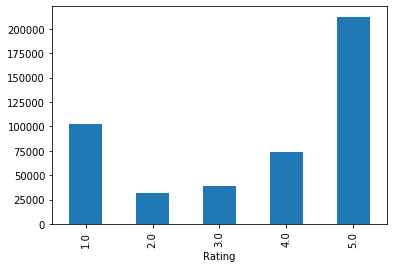

In [9]:
df_small.groupby(['Rating']).size().plot.bar()

In [10]:
rated_products_per_user = df_small.groupby(by='UserID')['Rating'].count().sort_values(ascending=False)
print(rated_products_per_user, "\n", "\n", rated_products_per_user.describe())

UserID
A5JLAU2ARJ0BO           73
A680RUE1FDO8B           71
A225G2TFM76GYX          69
A3W4D8XOGLWUN5          68
A15S4XW3CRISZ5          66
                        ..
A3FLUNWZ1P37UW           1
A3FLUOIZPA5KSB           1
A3FLUTCXZ8HCUN           1
A3FLVZRU40GOND           1
A00577669P2XCLU956L8     1
Name: Rating, Length: 375147, dtype: int64 
 
 count    375147.000000
mean          1.224683
std           0.891902
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          73.000000
Name: Rating, dtype: float64


In [11]:
heavy_users = df_small.groupby(by='UserID')['Rating'].count()

In [12]:
# Top 5 Users
heavy_users.sort_values(ascending=False).head()

UserID
A5JLAU2ARJ0BO     73
A680RUE1FDO8B     71
A225G2TFM76GYX    69
A3W4D8XOGLWUN5    68
A15S4XW3CRISZ5    66
Name: Rating, dtype: int64

In [13]:
df_small.groupby('ProductID')['Rating'].mean().sort_values(ascending=False).head()

ProductID
B01HJAMWOK    5.0
B002JAT2S0    5.0
B002E8EREQ    5.0
B002EXYP48    5.0
B002FD3688    5.0
Name: Rating, dtype: float64

In [14]:
#Total no of rating for product

df_small.groupby('ProductID')['Rating'].count().sort_values(ascending=False).head()

ProductID
B00UB76290    8994
B00CTTEKJW    7939
B00NG7JVSQ    6395
B00H9A60O4    4730
B00E6LJ2SA    4048
Name: Rating, dtype: int64

In [15]:
ratings_mean_count = pd.DataFrame(df_small.groupby('ProductID')['Rating'].mean())

In [16]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df_small.groupby('ProductID')['Rating'].count())

In [17]:
# Popularity based recom

ratings_mean_count.sort_values(by='rating_counts', ascending=False)

,Rating,rating_counts
ProductID,,
B00UB76290,4.231043,8994
B00CTTEKJW,3.746819,7939
B00NG7JVSQ,3.418765,6395
B00H9A60O4,4.076533,4730
B00E6LJ2SA,3.269516,4048
...,...,...
B0019QT0WI,5.000000,1
B0019S3504,1.000000,1
B0019S4NU0,1.000000,1


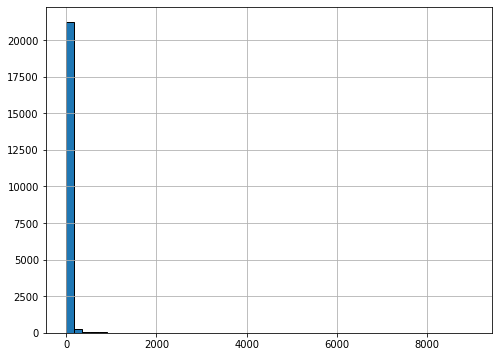

In [44]:
# Verteilung der Rating_Counts
plt.figure(figsize=(8,6))
ratings_mean_count['rating_counts'].hist(bins=50)

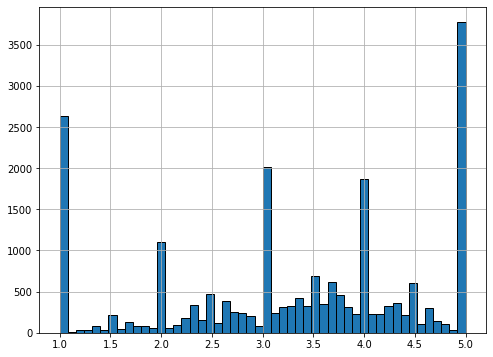

In [41]:
# Verteilung der Ratings (Histogram)
plt.figure(figsize=(8,6))
ratings_mean_count['Rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

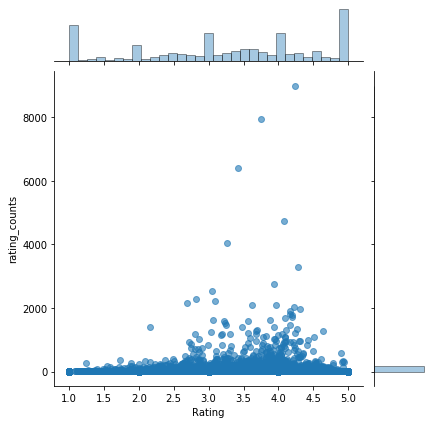

In [20]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.6)

In [21]:
most_popular_products = pd.DataFrame(df_small.groupby('ProductID')['Rating'].count()).sort_values('Rating', ascending=False).head(20)
most_popular_products

,Rating
ProductID,
B00UB76290,8994
B00CTTEKJW,7939
B00NG7JVSQ,6395
B00H9A60O4,4730
B00E6LJ2SA,4048
B00EZPXYP4,3304
B015724OVG,2745
B008RA5A00,2525
B00MYXTCGY,2271


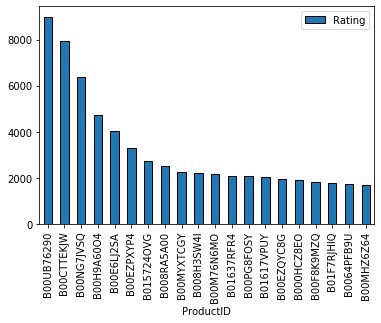

In [22]:
most_popular_products.plot.bar()

In [29]:
# Need to account for weighted average
score_matrix = ratings_mean_count.sort_values(by='rating_counts', ascending=False)
C = score_matrix['Rating'].mean()
m = score_matrix['rating_counts'].quantile(0.90)

# v = number of votes for the movie 
# m = minimum votes required to be listed in the chart
# R = average rating of the movie 
# C = mean vote across the whole report 

def weighted_rating(x, m=m, C=C):
    v = x['rating_counts']
    R = x['Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

score_matrix['score'] = score_matrix.apply(weighted_rating, axis=1)
score_matrix.sort_values('score', ascending=False)

,Rating,rating_counts,score
ProductID,,,
B0000AZJY6,4.897924,578,4.822159
B000050ZRE,4.937908,306,4.797166
B000EORV8Q,4.929012,324,4.796178
B0001FS9NE,4.915309,307,4.776937
B005CSF1JK,4.787645,259,4.639065
...,...,...,...
B000LJYUW4,1.515789,95,1.935893
B0002LXRXY,1.589147,129,1.905385
B00006ULHT,1.724432,352,1.845278


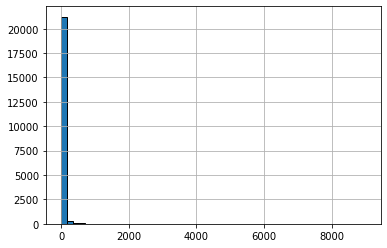

In [38]:
# Vergleich der Metriken Rating Counts, Rating und der neu gebauten Metric Score
# Als letztes dann noch Cross-Tab von jeweils zwei Metriken 

score_matrix['rating_counts'].hist(bins=50)

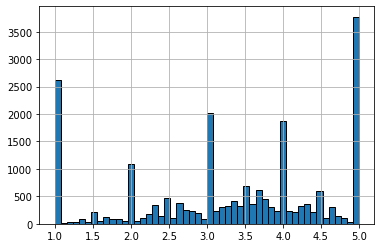

In [40]:
score_matrix['Rating'].hist(bins=50)

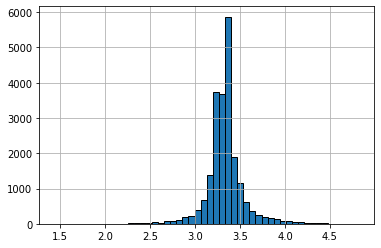

In [39]:
score_matrix['score'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

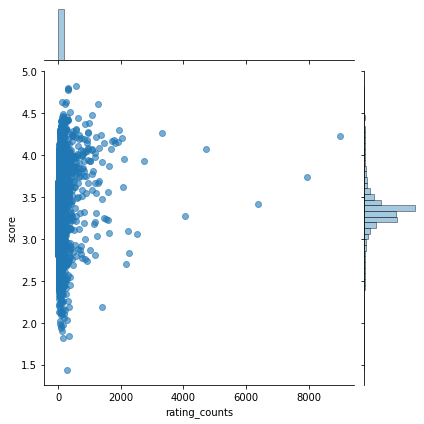

In [50]:
####### Rating counts vs Score #####################
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating_counts', y='score', data=score_matrix, alpha=0.6)

<Figure size 576x432 with 0 Axes>

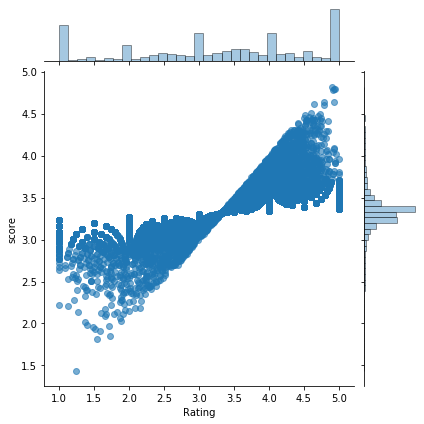

In [52]:
####### Rating vs Score #####################
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='score', data=score_matrix, alpha=0.6)